<a href="https://colab.research.google.com/github/karapradeepkumar/Group14_MLUL2/blob/main/Group14_MLUL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing libraries and importing packages

In [1]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9004300de647a3753b83f69d5d4e4baff712aeeb1cde95ac309b36843dbcc137
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


### Reading the Dataset

In [335]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import TruncatedSVD
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

In [316]:
import warnings
warnings.filterwarnings('ignore')

In [224]:
retail_data = pd.read_excel("https://raw.githubusercontent.com/karapradeepkumar/data/main/Online%20Retail%202.xlsx", engine='openpyxl')

In [225]:
retail_data.shape

(541909, 8)

### Creating Data Profile

In [4]:
profile = ProfileReport(retail_data, title="Pandas Profiling Report")


In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Exporting the report to a file


In [6]:
profile.to_file("retail_data.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data cleaning

In [226]:
# Display duplicate values
retail_data.duplicated().sum()

5268

In [227]:
# Dropping duplicate rows
retail_data.drop_duplicates(inplace=True)

In [228]:
# Display null values
retail_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [55]:
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [229]:
# Handling missing CustomerID:
# If CustomerID is missing, we will create a placeholder category for analysis.
retail_data['CustomerID'].fillna('Unknown', inplace=True)

<ipython-input-229-75360b268ab7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail_data['CustomerID'].fillna('Unknown', inplace=True)
<ipython-input-229-75360b268ab7>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  retail_data['CustomerID'].fillna('Unknown', inplace=True)


In [230]:
# We will not drop the nu.. values
#retail_data.dropna(inplace=True)
# Adding a new column to categorize rows with missing CustomerID
retail_data['CustomerID_Flag'] = retail_data['CustomerID'].apply(lambda x: 'Known' if x != 'Unknown' else 'Unknown')

In [231]:
# Add TotalPrice column
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

In [59]:
# Convert InvoiceDate to a datetime and use as index
#retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
#retail_data.set_index('InvoiceDate', inplace=True)

In [232]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34


In [235]:
# Segment Sales by Months and Days
# Add columns for Month and Day of the Week
retail_data['Month'] = retail_data['InvoiceDate'].dt.month
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.day_name()

In [236]:
retail_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
CustomerID_Flag,0
TotalPrice,0


In [237]:
# Extract numeric part from StockCode for use in segmentation
retail_data['NumericStockCode'] = retail_data['StockCode'].str.extract(r'(\d+)', expand=False).astype(float)

In [238]:
# Summary of the data
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         536641 non-null  object        
 1   StockCode         536641 non-null  object        
 2   Description       535187 non-null  object        
 3   Quantity          536641 non-null  int64         
 4   InvoiceDate       536641 non-null  datetime64[ns]
 5   UnitPrice         536641 non-null  float64       
 6   CustomerID        536641 non-null  object        
 7   Country           536641 non-null  object        
 8   CustomerID_Flag   536641 non-null  object        
 9   TotalPrice        536641 non-null  float64       
 10  Month             536641 non-null  int32         
 11  DayOfWeek         536641 non-null  object        
 12  NumericStockCode  51697 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)


In [240]:
# add a column with cancellation 1 if cancelled and 0 if not cancellation is based on Quantity <0
retail_data['Cancelled'] = retail_data['Quantity'].apply(lambda x: 1 if x < 0 else 0)

In [242]:
retail_data['InvoiceNo'] = retail_data['InvoiceNo'].astype(str)
retail_data['StockCode'] = retail_data['StockCode'].astype(str)
retail_data['Description'] = retail_data['Description'].astype(str)
retail_data['CustomerID'] = retail_data['CustomerID'].astype(str)

In [243]:
# saving the cleaned data to a parquet file
retail_data.to_parquet('retail_data.parquet')

In [244]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


In [245]:
# Display product description
top_categories = retail_data['Description'].value_counts().head(10).index.tolist()
top_categories

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'nan',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'LUNCH BAG  BLACK SKULL.']

### Feature engineering. - To delete
* Extracting color from the data
* Extracting shape from the data
* Extracting the number of items group

In [248]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


### Basic analysis of the data (descriptive statistics and visualization )

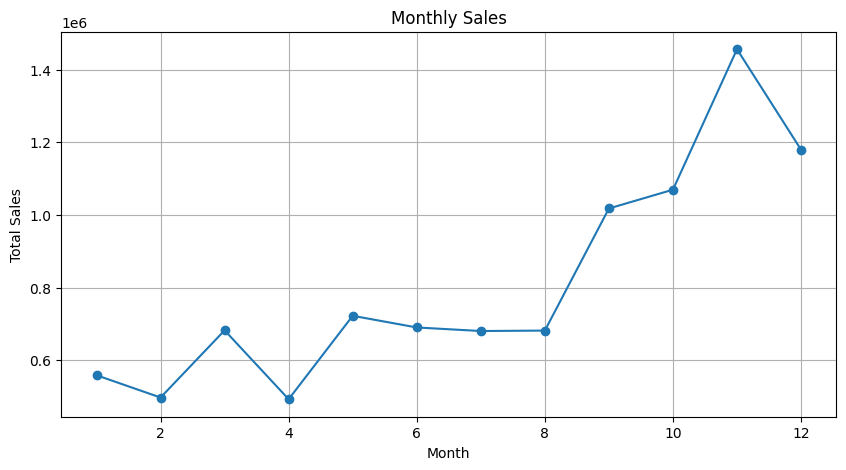

In [254]:
# Visualizing Monthly Sales
# Group sales by month and day of the week for analysis
monthly_sales = retail_data.groupby('Month')['TotalPrice'].sum()
daywise_sales = retail_data.groupby('DayOfWeek')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

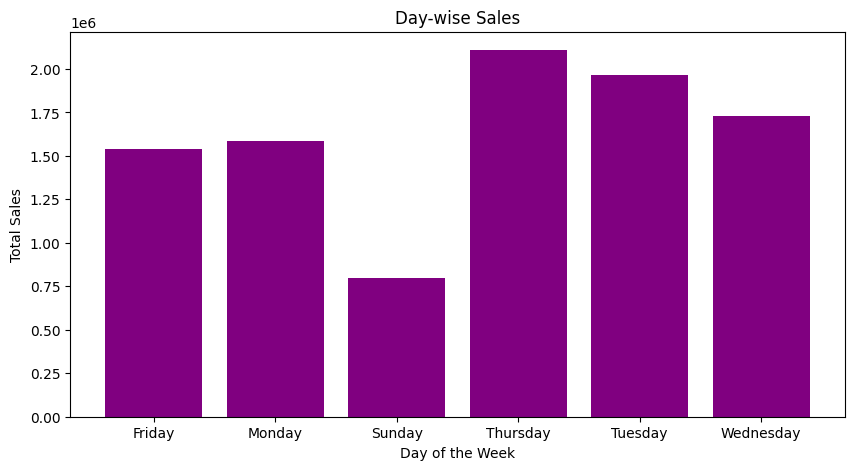

In [255]:
# Visualizing Day-wise Sales
plt.figure(figsize=(10, 5))
plt.bar(daywise_sales.index, daywise_sales.values, color='purple')
plt.title("Day-wise Sales")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()

### EDA

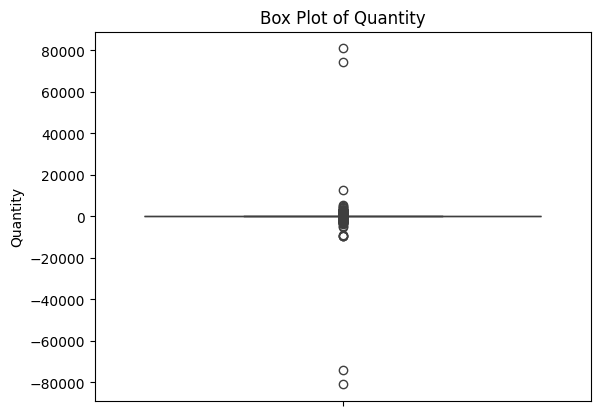

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(y=retail_data['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.show()

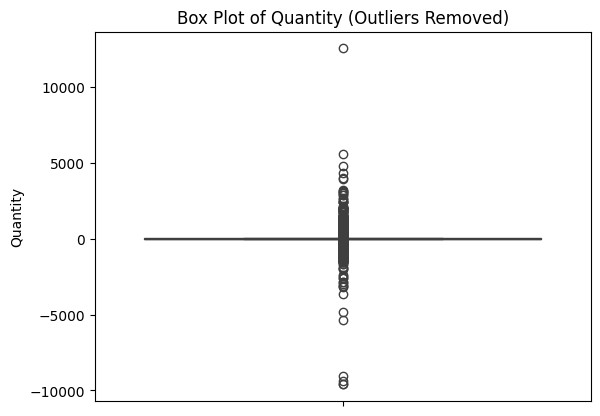

In [258]:
# Calculate the absolute difference from the median
median = retail_data['Quantity'].median()
abs_diff = np.abs(retail_data['Quantity'] - median)

# Get the indices of the two largest differences (outliers)
outlier_indices = abs_diff.nlargest(4).index

# Drop the rows corresponding to the outlier indices
filtered_data = retail_data.drop(outlier_indices)
#plt.figure(figsize=(6, 10))
sns.boxplot(y=filtered_data['Quantity'])
plt.title('Box Plot of Quantity (Outliers Removed)')
plt.ylabel('Quantity')
plt.show()

In [259]:
# Most sold products
top_products = filtered_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top revenue-generating products
top_revenue_products = filtered_data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Most Sold Products:")
print(top_products)

print("\nTop 10 Revenue-Generating Products:")
print(top_revenue_products)


Top 10 Most Sold Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

Top 10 Revenue-Generating Products:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIG

In [260]:
# Total revenue by customer
customer_revenue = filtered_data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Total quantity purchased by customer
customer_quantity = filtered_data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Customers by Revenue:")
print(customer_revenue)

print("\nTop 10 Customers by Quantity Purchased:")
print(customer_quantity)


Top 10 Customers by Revenue:
CustomerID
Unknown    1447487.53
14646.0     279489.02
18102.0     256438.49
17450.0     187322.17
14911.0     132458.73
12415.0     123725.45
14156.0     113214.59
17511.0      88125.38
16684.0      65892.08
13694.0      62690.54
Name: TotalPrice, dtype: float64

Top 10 Customers by Quantity Purchased:
CustomerID
Unknown    269651
14646.0    196719
12415.0     77242
14911.0     77155
17450.0     69009
18102.0     64122
17511.0     63012
13694.0     61899
14298.0     58021
14156.0     56908
Name: Quantity, dtype: int64



Sales by Country:
Country
United Kingdom          8167128.184
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7901.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
M

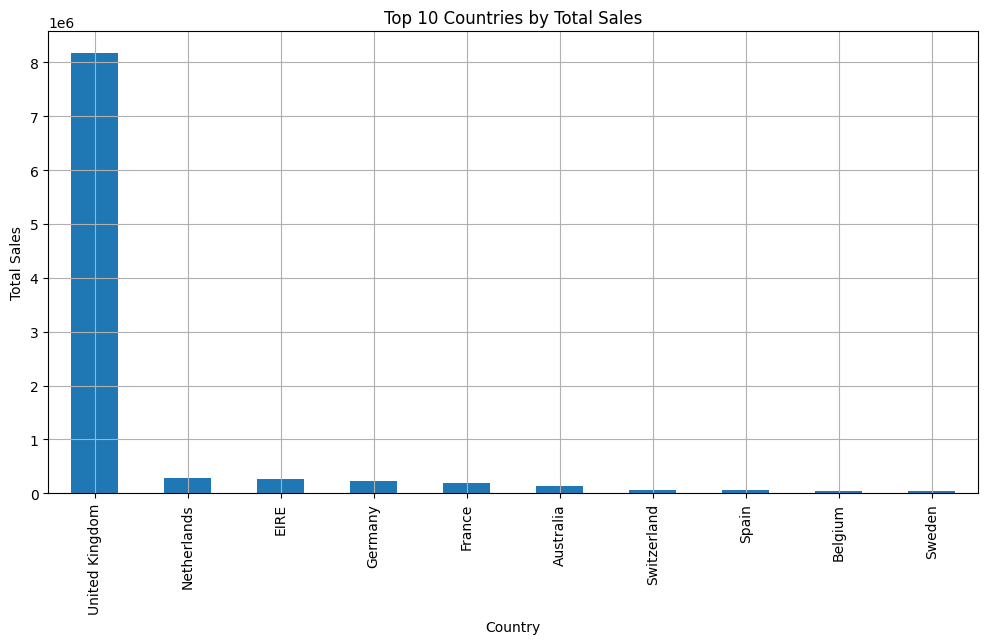

In [261]:
# Sales by country
country_sales = filtered_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

print("\nSales by Country:")
print(country_sales)

# Top 10 countries by sales
top_countries = country_sales.head(10)

# Plot top countries by sales
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.grid()
plt.show()

In [263]:
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Known,10.20,12,Friday,NaN,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Known,12.60,12,Friday,NaN,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Known,16.60,12,Friday,NaN,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Known,16.60,12,Friday,NaN,0


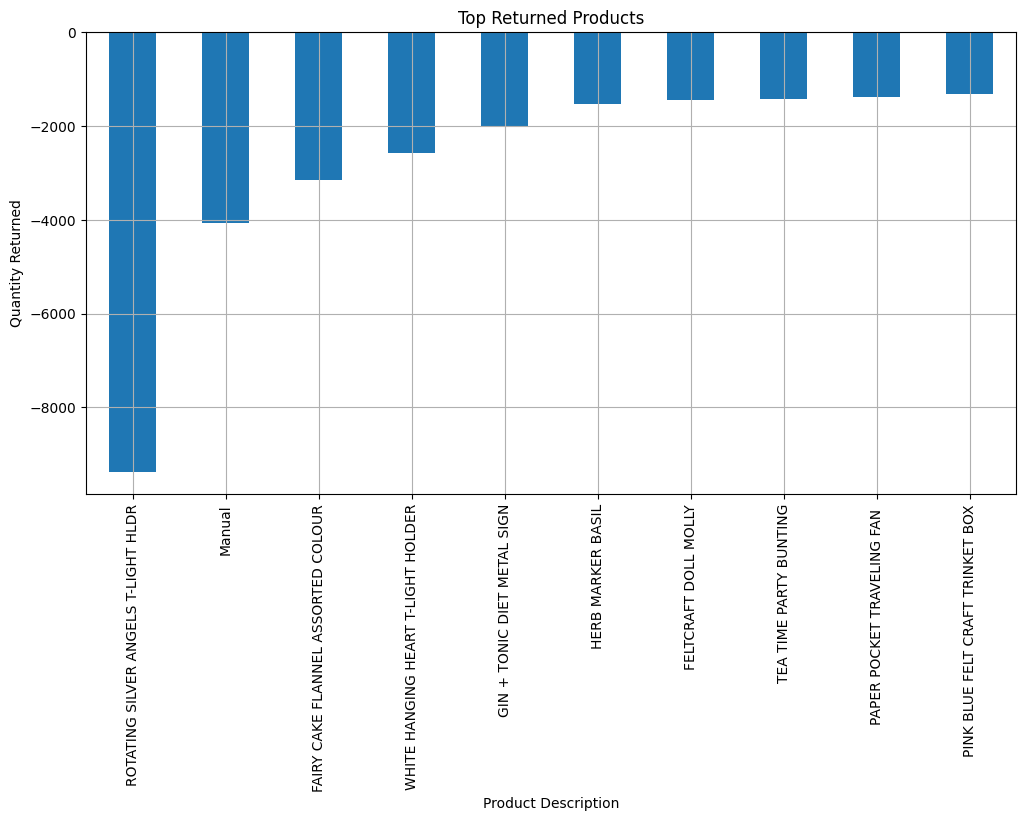

In [265]:
# Filter returns (negative quantities)
returns =  filtered_data[filtered_data['InvoiceNo'].astype(str).str.startswith('C')]

# Total returns by product
returns_by_product = returns.groupby('Description')['Quantity'].sum().sort_values()

# Plot top returned products
top_returns = returns_by_product.head(10)
plt.figure(figsize=(12, 6))
top_returns.plot(kind='bar')
plt.title("Top Returned Products")
plt.ylabel("Quantity Returned")
plt.xlabel("Product Description")
plt.grid()
plt.show()

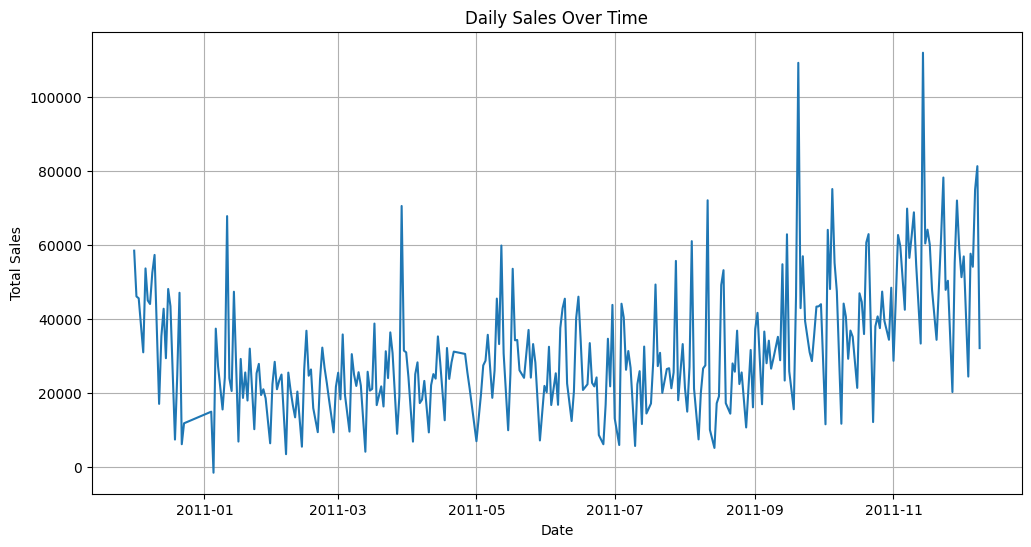

In [267]:
# Additional Exploratory Data Analysis
# Daily Sales Over Time
daily_sales = filtered_data.groupby(filtered_data['InvoiceDate'].dt.date)['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

### Customer Segmentation

In [269]:
# Initial Exploration and Data Cleaning
# Remove negative quantities for segmentation and regression purposes
df_segmentation = filtered_data.copy()
df_segmentation = df_segmentation[df_segmentation['Quantity'] > 0]

In [272]:
df_segmentation.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


In [273]:
# Extract numeric part from StockCode for use in segmentation
df_segmentation['NumericStockCode'] = df_segmentation['StockCode'].str.extract(r'(\d+)', expand=False).astype(float)

In [275]:
# Retain all rows (including negative quantities) for cancellation analysis
df_cancellations = filtered_data[filtered_data['Quantity'] < 0]

### Product Clustering using K-Means - Required for customer segmentation and recommendation System

In [276]:
# Product Clustering
product_features = df_segmentation[['NumericStockCode']].drop_duplicates().dropna()
scaler = StandardScaler()
scaled_product_features = scaler.fit_transform(product_features)

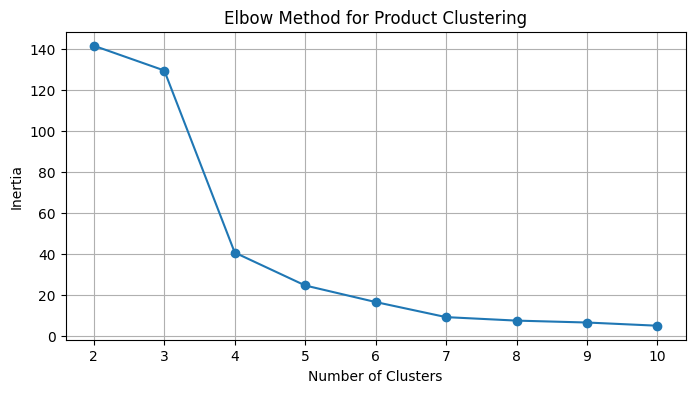

In [277]:
# Use the Elbow Method for product clustering
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_product_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Product Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

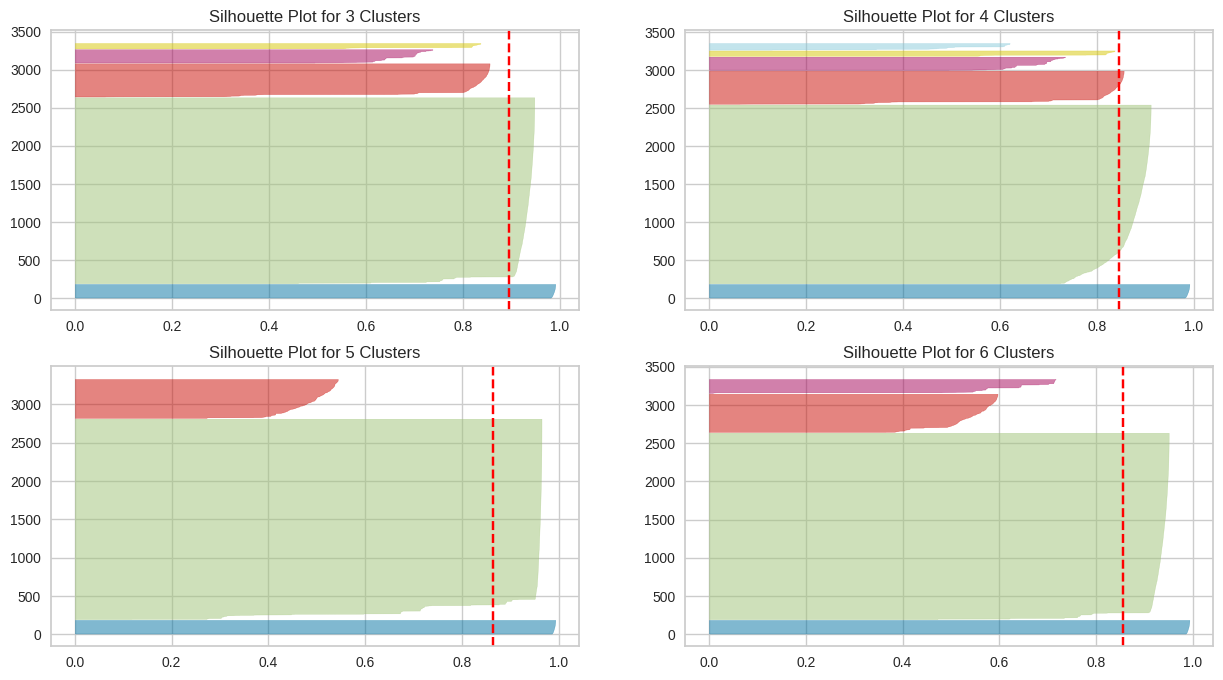

In [281]:
# Use Silhoutte visualizer to assess the quality of the clusters for different values of k
fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [3, 4, 5, 6]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    ax[q][mod].set_title(f"Silhouette Plot for {k} Clusters")
    visualizer.fit(scaled_product_features)

In [282]:
# Apply KMeans clustering for products
optimal_product_clusters = 5  # Adjust based on the elbow method
kmeans_products = KMeans(n_clusters=optimal_product_clusters, random_state=42)
product_features['ProductCluster'] = kmeans_products.fit_predict(scaled_product_features)

# Ensure all feature names are strings to avoid errors
product_features.columns = product_features.columns.astype(str)

# Map product clusters back to the original dataframe
df_segmentation = df_segmentation.merge(product_features, on='NumericStockCode', how='left')

### Customer segmentation using K-Means

In [283]:
df_segmentation.shape

(526052, 15)

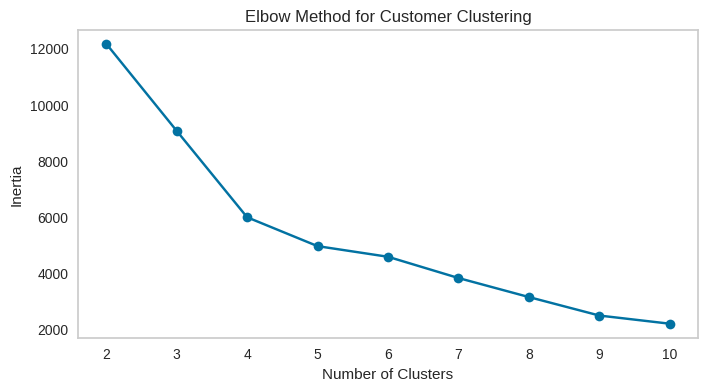

In [284]:
# Customer Segmentation Using Product Clusters
customer_product_matrix = df_segmentation.pivot_table(
    index='CustomerID',
    columns='ProductCluster',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Add existing customer-level features
customer_data = df_segmentation.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'count'  # Transaction count
}).rename(columns={
    'TotalPrice': 'TotalRevenue',
    'InvoiceNo': 'TransactionCount'
})
customer_data['AvgBasketValue'] = customer_data['TotalRevenue'] / customer_data['TransactionCount']

# Combine product cluster features with customer-level data
customer_data = customer_data.join(customer_product_matrix, how='left').fillna(0)

# Ensure all column names in customer_data are strings
customer_data.columns = customer_data.columns.astype(str)

# Standardize features for customer clustering
scaled_customer_data = scaler.fit_transform(customer_data)

# Use the Elbow Method for customer clustering
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Customer Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()



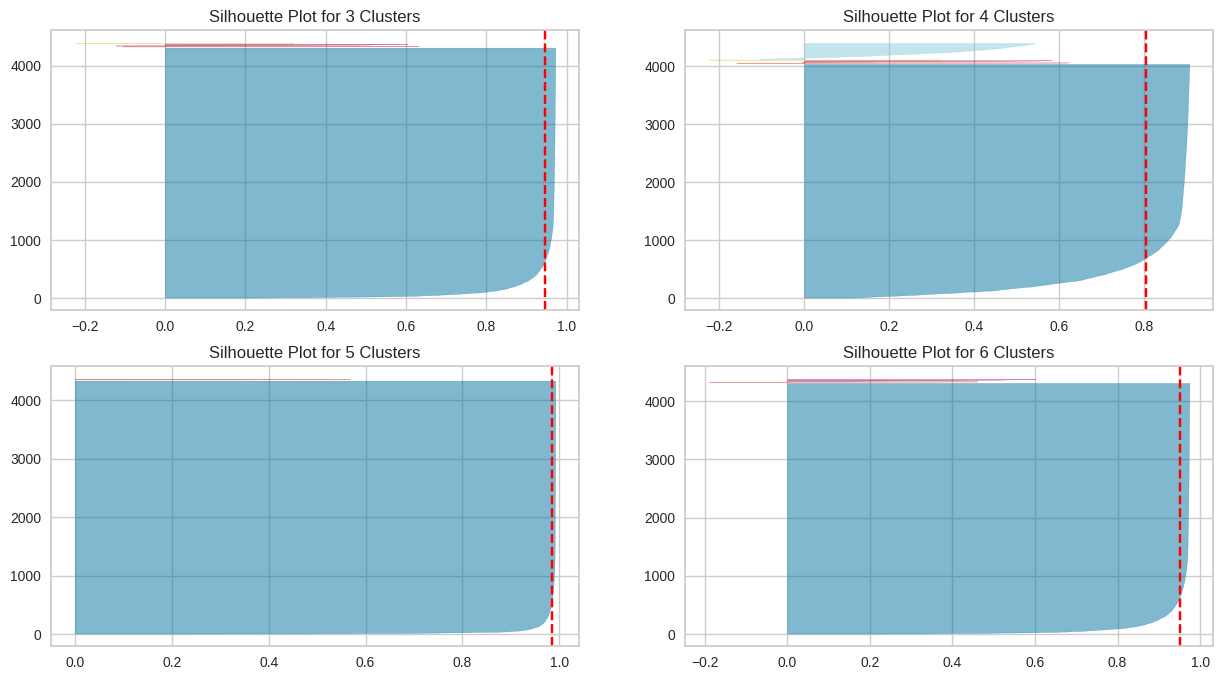

In [285]:
# Use Silhoutte visualizer to assess the quality of the clusters for different values of k
fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [3,4,5,6]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    ax[q][mod].set_title(f"Silhouette Plot for {k} Clusters")
    visualizer.fit(customer_data)

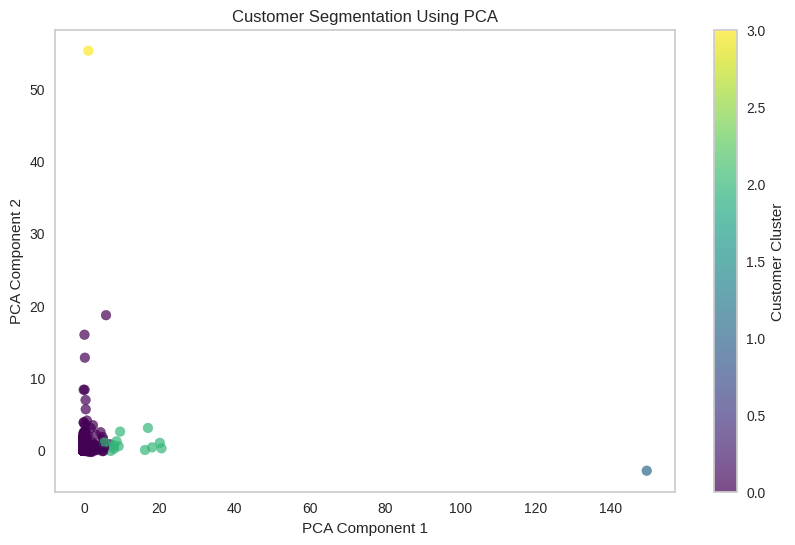

Customer Cluster Summary:
                 TotalRevenue  TransactionCount  AvgBasketValue          0.0  \
CustomerCluster                                                                
0                1.651178e+03         86.062702       34.066049     1.349607   
1                1.732778e+06     133322.000000       12.996938  3959.000000   
2                9.768325e+04       1384.266667      175.051852   101.400000   
3                3.991650e+04          3.000000    13305.500000     0.000000   

                           1.0           2.0           3.0          4.0  
CustomerCluster                                                          
0                   792.807959    138.446321     24.410227    10.341509  
1                363518.000000  76576.000000  25711.000000  4144.000000  
2                 44890.400000   6282.066667   1934.466667  1428.533333  
3                   121.000000      0.000000      0.000000     0.000000  


In [286]:
# Apply KMeans clustering for customers
optimal_customer_clusters = 4  # Adjust based on the elbow method
kmeans_customers = KMeans(n_clusters=optimal_customer_clusters, random_state=42)
customer_data['CustomerCluster'] = kmeans_customers.fit_predict(scaled_customer_data)

# Visualize customer clusters using PCA
pca_customer = PCA(n_components=2)
pca_result_customer = pca_customer.fit_transform(scaled_customer_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result_customer[:, 0], pca_result_customer[:, 1], c=customer_data['CustomerCluster'], cmap='viridis', alpha=0.7)
plt.title("Customer Segmentation Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Customer Cluster")
plt.grid()
plt.show()

# Display customer cluster summary
print("Customer Cluster Summary:")
print(customer_data.groupby('CustomerCluster').mean())

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


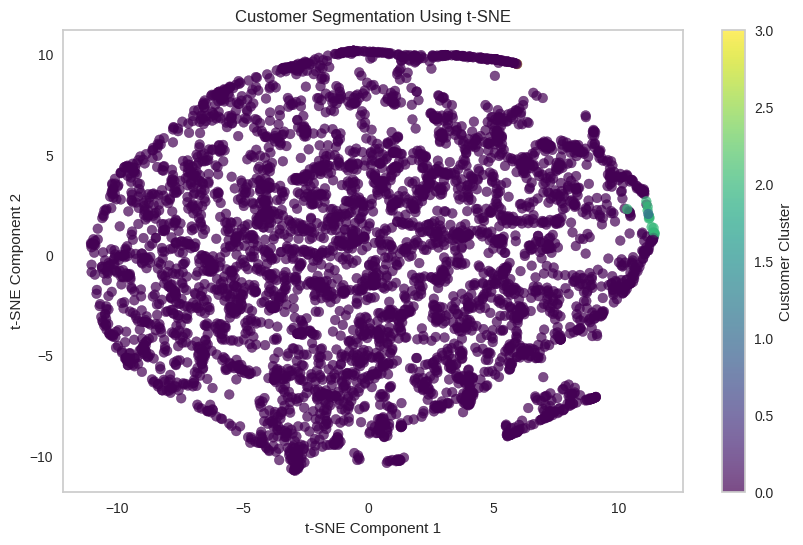

In [288]:
from sklearn.manifold import TSNE
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_customer_data)

# Visualize customer clusters with t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=customer_data['CustomerCluster'], cmap='viridis', alpha=0.7)
plt.title("Customer Segmentation Using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Customer Cluster")
plt.grid()
plt.show()

### Collaborative Filtering - Recommendation system

In [290]:
# Collaborative Filtering Implementation
# Create a customer-product matrix
customer_product_matrix_cf = df_segmentation.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

In [291]:

# Include product descriptions
product_info = df_segmentation[['StockCode', 'Description', 'ProductCluster']].drop_duplicates().set_index('StockCode')

# Ensure all column names are strings
customer_product_matrix_cf.columns = customer_product_matrix_cf.columns.astype(str)

In [292]:
# Apply Matrix Factorization using SVD

n_components = 20  # Number of latent features
svd = TruncatedSVD(n_components=n_components, random_state=42)
latent_features = svd.fit_transform(customer_product_matrix_cf)

# Reconstruct the matrix
reconstructed_matrix = np.dot(latent_features, svd.components_)

# Convert reconstructed matrix back to a DataFrame
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=customer_product_matrix_cf.index, columns=customer_product_matrix_cf.columns)

In [294]:
# Recommend products for a specific customer (example: 'CustomerID')
def recommend_products(customer_id, num_recommendations=5):
  """
  Recommend products for a specific customer.

  """
  customer_row = reconstructed_df.loc[customer_id]
  top_products = customer_row[customer_row > 0].sort_values(ascending=False).index[:num_recommendations]
  recommendations = (pd.DataFrame({'StockCode': top_products})
                       .merge(product_info, left_on='StockCode', right_index=True, how='left')
                       .drop_duplicates(subset='StockCode'))
  return recommendations[['StockCode', 'Description', 'ProductCluster']]

In [295]:
# Example usage:
example_customer_id = customer_product_matrix_cf.index[3]
print(f"Top recommendations for customer {example_customer_id}:")
print(recommend_products(example_customer_id))


Top recommendations for customer 12350.0:
  StockCode                         Description  ProductCluster
0     21915              RED  HARMONICA IN BOX              1.0
1     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS             2.0
2     21891    TRADITIONAL WOODEN SKIPPING ROPE             1.0
3     22440       BALLOON WATER BOMB PACK OF 35             1.0
4     22693  GROW A FLYTRAP OR SUNFLOWER IN TIN             1.0


In [296]:
example_customer_id = customer_product_matrix_cf.index[15]
print(f"Top recommendations for customer {example_customer_id}:")
print(recommend_products(example_customer_id))

Top recommendations for customer 12363.0:
  StockCode                         Description  ProductCluster
0     21212     PACK OF 72 RETROSPOT CAKE CASES             1.0
1     84992      72 SWEETHEART FAIRY CAKE CASES             2.0
2     84991         60 TEATIME FAIRY CAKE CASES             2.0
3     21977  PACK OF 60 PINK PAISLEY CAKE CASES             1.0
4     21213         PACK OF 72 SKULL CAKE CASES             1.0


In [297]:
example_customer_id = customer_product_matrix_cf.index[23]
print(f"Top recommendations for customer {example_customer_id}:")
print(recommend_products(example_customer_id))

Top recommendations for customer 12374.0:
  StockCode                         Description  ProductCluster
0     21108  FAIRY CAKE FLANNEL ASSORTED COLOUR             1.0
1     21212     PACK OF 72 RETROSPOT CAKE CASES             1.0
2     21175         GIN + TONIC DIET METAL SIGN             1.0
3    85123A  WHITE HANGING HEART T-LIGHT HOLDER             2.0
4     84992      72 SWEETHEART FAIRY CAKE CASES             2.0


### Association rules - Apriori Algorithm (only for items which are appearing in over 1000 invoices

In [301]:
# Apriori Algorithm for Association Rules
# Prepare the data for Apriori
basket = (df_segmentation.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

# Convert quantities to 1 (purchased) or 0 (not purchased)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Filter products that appear in more than 1000 transactions
product_transaction_counts = basket_sets.sum(axis=0)
basket_sets = basket_sets.loc[:, product_transaction_counts[product_transaction_counts > 1000].index]

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets = 2)

# Handle duplicate pairs where antecedents and consequents are switched
rules['sorted_pair'] = rules.apply(lambda x: frozenset(x['antecedents']).union(x['consequents']), axis=1)
rules = rules.sort_values(by='confidence', ascending=False).drop_duplicates(subset=['sorted_pair'])

# Drop the helper column
rules = rules.drop(columns=['sorted_pair'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-301-e2e65926abd6>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top Association Rules:
                                           antecedents  \
404  (JAM MAKING SET WITH JARS, ROSES REGENCY TEACU...   
411  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   
27                   (GREEN REGENCY TEACUP AND SAUCER)   
610      (LUNCH BAG CARS BLUE, LUNCH BAG APPLE DESIGN)   
496  (LUNCH BAG  BLACK SKULL., LUNCH BAG APPLE DESIGN)   

                            consequents  antecedent support  \
404   (GREEN REGENCY TEACUP AND SAUCER)            0.012110   
411  (ROSES REGENCY TEACUP AND SAUCER )            0.024559   
27   (ROSES REGENCY TEACUP AND SAUCER )            0.048972   
610            (LUNCH BAG SUKI DESIGN )            0.017707   
496            (LUNCH BAG SUKI DESIGN )            0.020023   

     consequent support   support  confidence       lift  representativity  \
404            0.048972  0.010084    0.832669  17.002861               1.0   
411            0.051433  0.019685    0.801572  15.584780               1.0   
27             

In [303]:

# Display top rules
print("Top Association Rules:")
display(rules.sort_values(by='lift', ascending=False).head())

Top Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
404,"(JAM MAKING SET WITH JARS, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.012110,0.048972,0.010084,0.832669,17.002861,1.0,0.009491,5.683523,0.952724,0.197729,0.824053,0.519290
411,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.024559,0.051433,0.019685,0.801572,15.584780,1.0,0.018422,4.780402,0.959396,0.349614,0.790813,0.592155
27,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.048972,0.051433,0.037055,0.756650,14.711382,1.0,0.034536,3.897958,0.980019,0.584920,0.743455,0.738550
610,"(LUNCH BAG CARS BLUE, LUNCH BAG APPLE DESIGN)",(LUNCH BAG SUKI DESIGN ),0.017707,0.052350,0.011676,0.659401,12.596070,1.0,0.010749,2.782301,0.937205,0.200000,0.640585,0.441221
496,"(LUNCH BAG BLACK SKULL., LUNCH BAG APPLE DESIGN)",(LUNCH BAG SUKI DESIGN ),0.020023,0.052350,0.012931,0.645783,12.335946,1.0,0.011882,2.675339,0.937712,0.217532,0.626216,0.446394


### Cancellation Analysis and Policy Improvements Anomaly detection using the Density-Based Local Outlier Factor (LOF)

In [519]:
# get only calncelled orders
cancelled_orders = filtered_data[filtered_data['Cancelled'] == 1]

In [547]:
cancelled_orders.shape

(10585, 14)

In [549]:
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Known,-27.50,12,Wednesday,NaN,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Known,-4.65,12,Wednesday,35004.0,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Known,-19.80,12,Wednesday,NaN,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1


In [550]:
numeric_columns = ['TotalPrice','Quantity','UnitPrice']
# Update based on the dataset removed 'NumericStockCode' 'CustomerID', 'Quantity', 'UnitPrice',

In [551]:
# cancelled orders for scaling
cancelled_orders_copy = cancelled_orders.copy()
cancelled_orders_numeric = cancelled_orders[numeric_columns]

In [552]:
# scaling the cancelled orders
scaler = StandardScaler()
cancelled_orders_scaled = scaler.fit_transform(cancelled_orders_numeric)

In [553]:
cancelled_orders_scaled

array([[ 0.05264408,  0.12416773, -0.02393379],
       [ 0.08828654,  0.12416773, -0.06051747],
       [ 0.06465489,  0.07852054, -0.06532058],
       ...,
       [ 0.0101383 ,  0.10756875, -0.05043094],
       [ 0.09359001,  0.12416773, -0.065961  ],
       [ 0.08579079,  0.10756875, -0.065961  ]])

In [554]:
df_for_lof = pd.DataFrame(cancelled_orders_scaled, columns=numeric_columns)

In [555]:
df_for_lof

,TotalPrice,Quantity,UnitPrice
0,0.052644,0.124168,-0.023934
1,0.088287,0.124168,-0.060517
2,0.064655,0.078521,-0.065321
3,0.084683,0.028724,-0.067498
4,0.084683,0.028724,-0.067498
...,...,...,...
10580,0.081298,0.082670,-0.066633
10581,-0.254942,0.124168,0.291775
10582,0.010138,0.107569,-0.050431
10583,0.093590,0.124168,-0.065961


In [556]:
# top proudcts from cancelled_orders
cancelled_orders.groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(10)

,InvoiceNo
Description,
nan,862
Manual,244
REGENCY CAKESTAND 3 TIER,180
POSTAGE,126
check,120
JAM MAKING SET WITH JARS,87
Discount,77
SET OF 3 CAKE TINS PANTRY DESIGN,73
SAMPLES,60


In [558]:
# Finding the lof scores
lof = LocalOutlierFactor(n_neighbors=25)
lof_predictions = lof.fit_predict(df_for_lof)
lof_scores = -lof.negative_outlier_factor_
lof_scores

array([1.02233572, 1.23704836, 1.        , ..., 0.95856498, 1.        ,
       1.00111242])

In [559]:
# lof_scores count >1 and <1
print(len(lof_scores[lof_scores > 1]))
print(len(lof_scores[lof_scores <= 1]))

3563
7022


Text(0.5, 0, 'Outlier Score')

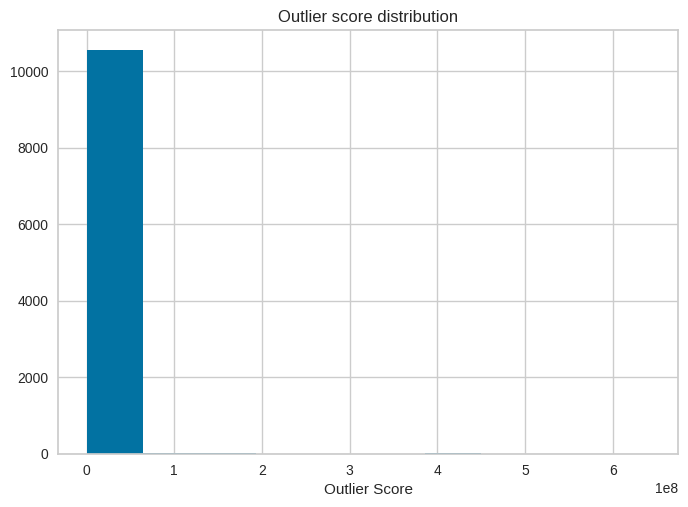

In [560]:
cancelled_orders_with_lof = pd.DataFrame(cancelled_orders_copy)

# Now you can assign the lof_scores as a new column
cancelled_orders_with_lof['lof_scores'] = lof_scores

# Proceed with plotting the histogram
cancelled_orders_with_lof['lof_scores'].hist()
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

Text(0.5, 0, 'Outlier Score')

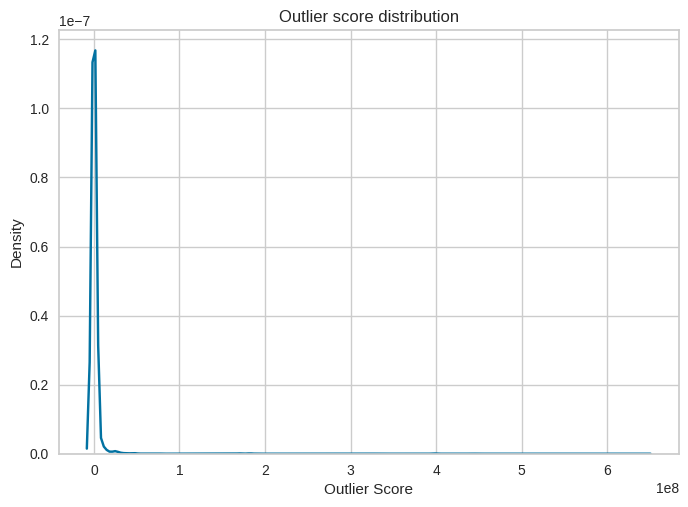

In [561]:
sns.kdeplot(cancelled_orders_with_lof['lof_scores'])
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

In [562]:
cancelled_orders_with_lof.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled,lof_scores
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Known,-27.50,12,Wednesday,NaN,1,1.022336e+00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Known,-4.65,12,Wednesday,35004.0,1,1.237048e+00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Known,-19.80,12,Wednesday,NaN,1,1.000000e+00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1,2.618840e+07
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1,2.618840e+07


In [563]:
# Top outliers
cancelled_orders_with_lof.sort_values(['lof_scores'], ascending=True)[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled,lof_scores
387525,570294,84249A,damaged,-25,2011-10-10 12:00:00,0.0,Unknown,United Kingdom,Unknown,-0.0,10,Monday,84249.0,1,0.915294
148083,549159,22052,nan,-25,2011-04-06 17:14:00,0.0,Unknown,United Kingdom,Unknown,-0.0,4,Wednesday,NaN,1,0.915294
185149,552763,21137,nan,-25,2011-05-11 11:33:00,0.0,Unknown,United Kingdom,Unknown,-0.0,5,Wednesday,NaN,1,0.915294
120580,546661,22777,nan,-25,2011-03-15 14:33:00,0.0,Unknown,United Kingdom,Unknown,-0.0,3,Tuesday,NaN,1,0.915294
140283,548396,22719,sold as 22467,-25,2011-03-30 17:21:00,0.0,Unknown,United Kingdom,Unknown,-0.0,3,Wednesday,NaN,1,0.915294
7205,537013,35965,nan,-25,2010-12-03 15:40:00,0.0,Unknown,United Kingdom,Unknown,-0.0,12,Friday,NaN,1,0.915294
268450,560423,16169K,nan,-25,2011-07-18 15:15:00,0.0,Unknown,United Kingdom,Unknown,-0.0,7,Monday,16169.0,1,0.915294
395564,571037,20669,nan,-25,2011-10-13 12:58:00,0.0,Unknown,United Kingdom,Unknown,-0.0,10,Thursday,NaN,1,0.915294
131704,547598,21332,nan,-25,2011-03-24 11:24:00,0.0,Unknown,United Kingdom,Unknown,-0.0,3,Thursday,NaN,1,0.915294
166486,550922,22784,damages,-25,2011-04-21 14:29:00,0.0,Unknown,United Kingdom,Unknown,-0.0,4,Thursday,NaN,1,0.915294


In [578]:
# Selecting outlier based on threshold
threshold = 1.5

In [579]:
cancelled_orders_with_lof['outlier_ind'] = "No"
cancelled_orders_with_lof.loc[cancelled_orders_with_lof['lof_scores']>threshold, 'outlier_ind'] = "Yes"

In [580]:
# cancelled orders without lof_scores
cancelled_orders_without_lof = cancelled_orders_with_lof.copy()
cancelled_orders_without_lof.drop('lof_scores', axis=1, inplace=True)

In [581]:
cancelled_orders_with_lof

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled,lof_scores,outlier_ind
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Known,-27.50,12,Wednesday,NaN,1,1.022336e+00,No
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Known,-4.65,12,Wednesday,35004.0,1,1.237048e+00,No
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Known,-19.80,12,Wednesday,NaN,1,1.000000e+00,No
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1,2.618840e+07,Yes
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1,2.618840e+07,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,Known,-9.13,12,Friday,NaN,1,1.725287e+00,Yes
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Known,-224.69,12,Friday,NaN,1,1.013316e+00,No
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,Known,-54.75,12,Friday,NaN,1,9.585650e-01,No
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,Known,-1.25,12,Friday,NaN,1,1.000000e+00,No


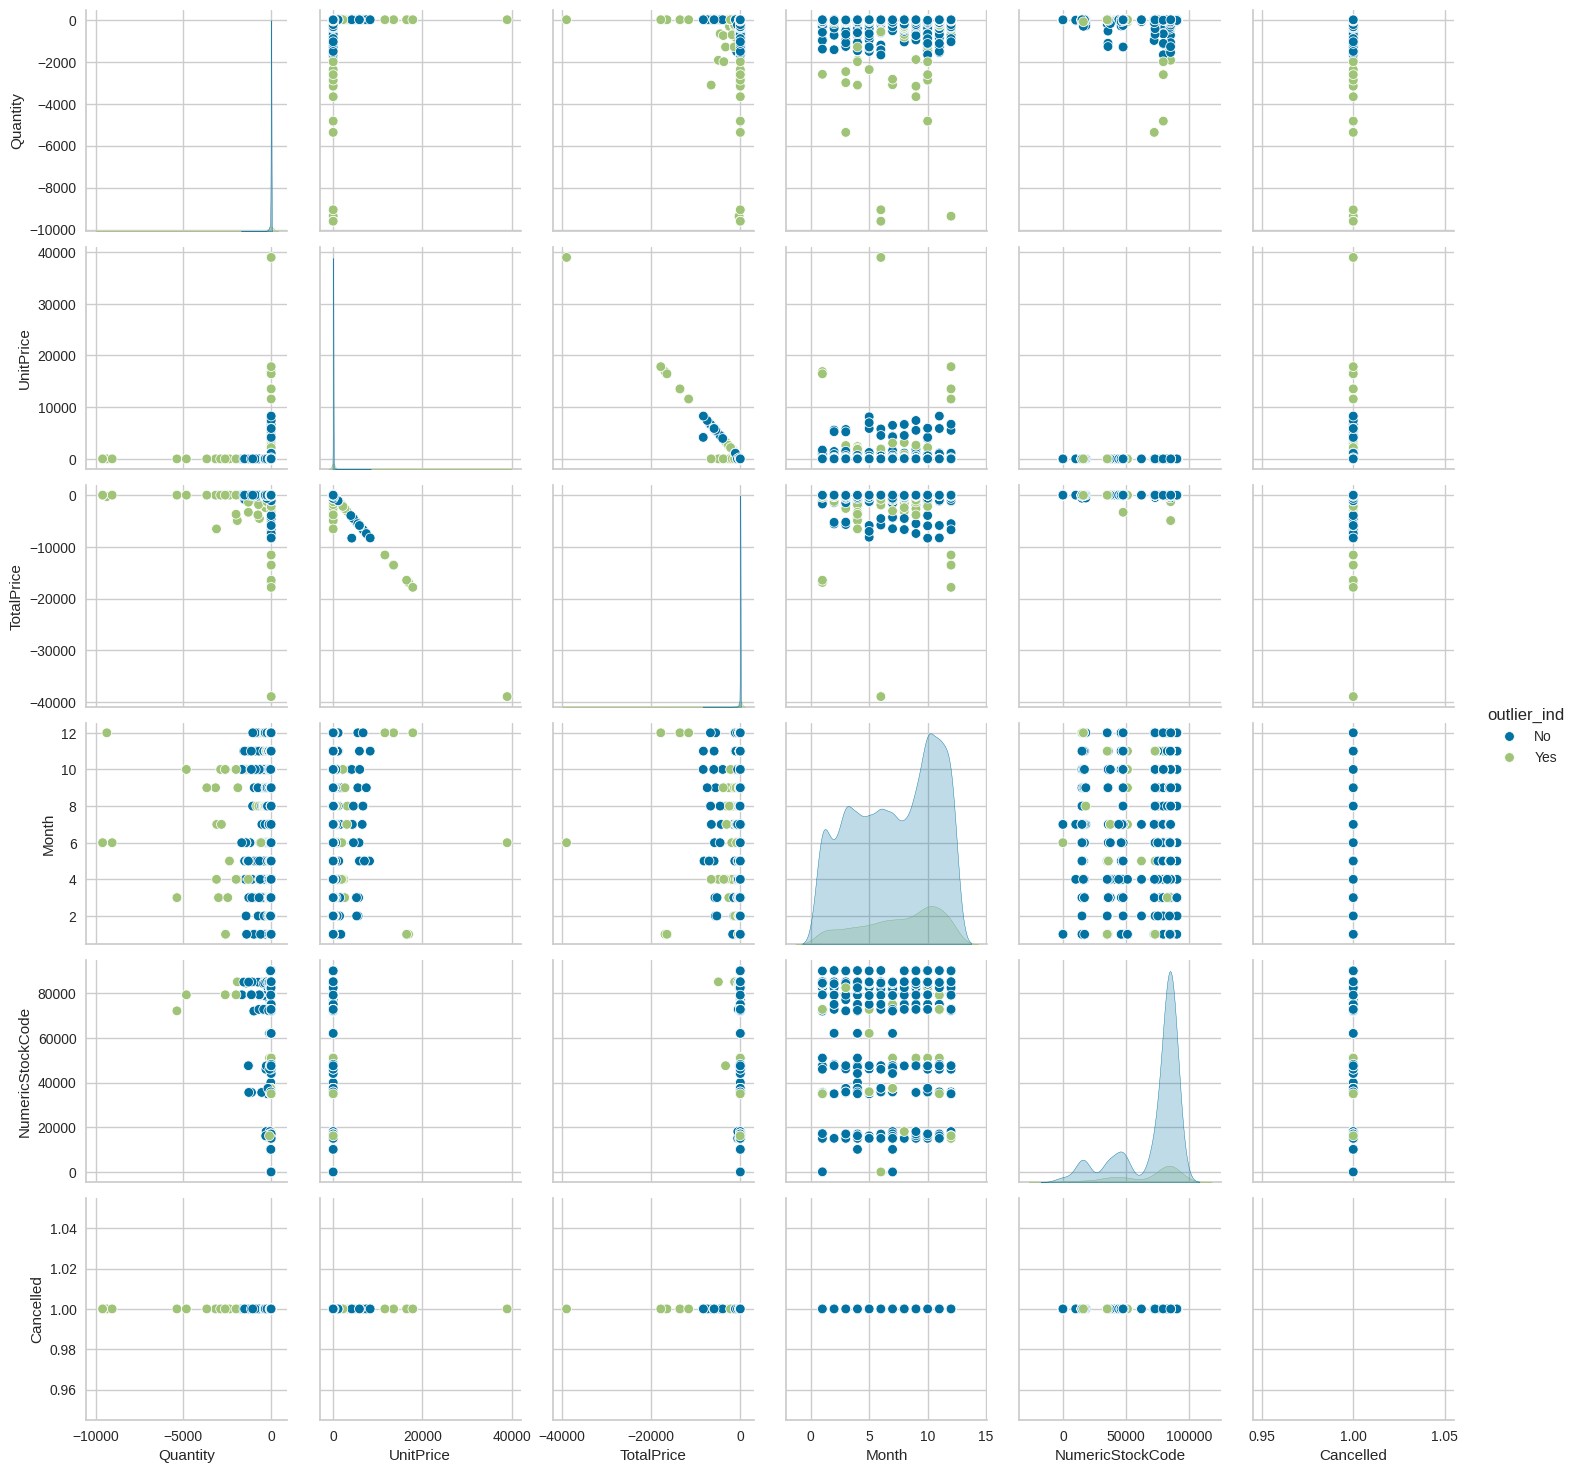

In [582]:
sns.pairplot(cancelled_orders_without_lof, hue = 'outlier_ind', diag_kind= "kde")

In [583]:
cancelled_pca = cancelled_orders_without_lof.drop(["outlier_ind"], axis=1)
cancelled_pca.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Known,-27.50,12,Wednesday,NaN,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Known,-4.65,12,Wednesday,35004.0,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Known,-19.80,12,Wednesday,NaN,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1


In [584]:
pca = PCA(n_components=2)
prComponents = pca.fit_transform(cancelled_pca[numeric_columns])
pca_df = pd.DataFrame(prComponents, columns = ['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,34.729039,30.850748
1,67.040673,30.681775
2,58.234624,18.577842
3,68.335075,7.334887
4,68.335075,7.334887


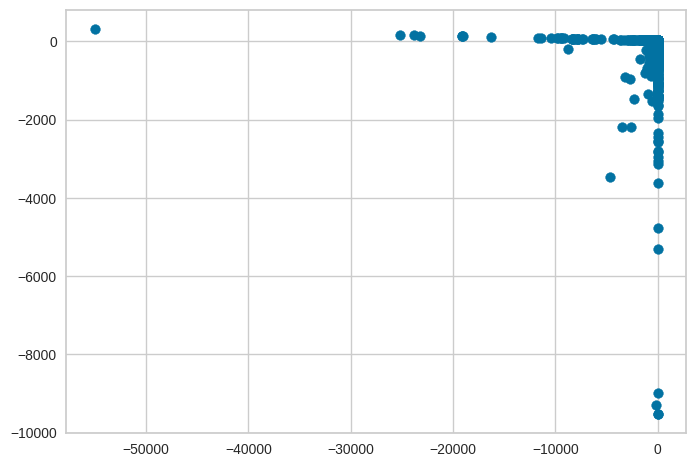

In [585]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])

In [587]:
pca_df['outlier'] = (cancelled_orders_with_lof['lof_scores']>threshold).values

In [588]:
pca_df.head()


,PC1,PC2,outlier
0,34.729039,30.850748,False
1,67.040673,30.681775,False
2,58.234624,18.577842,False
3,68.335075,7.334887,True
4,68.335075,7.334887,True


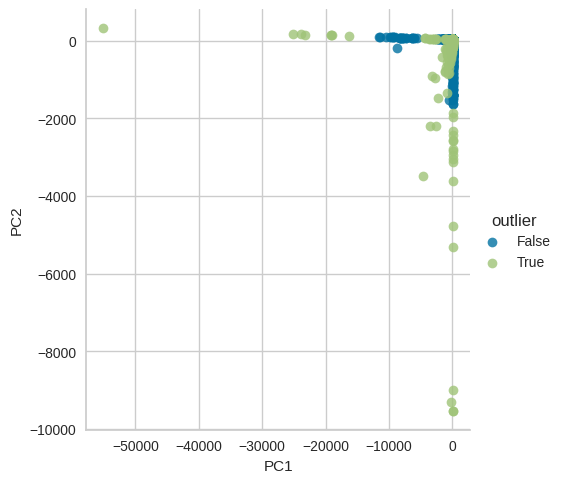

In [589]:
sns.lmplot(x="PC1", y="PC2", data=pca_df, fit_reg=False, hue='outlier')

In [590]:
from statsmodels.tsa.seasonal import STL

In [594]:
cancelled_temporal = filtered_data.copy()

In [596]:
cancelled_temporal['Month-Year'] = pd.to_datetime(cancelled_temporal['InvoiceDate'], format="%m/%d/%Y")

In [597]:
cancelled_temporal.set_index(['Month-Year'], inplace=True)

In [598]:
cancelled_temporal.index.freq = pd.infer_freq(cancelled_temporal.index)
cancelled_temporal.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
Month-Year,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


Text(0, 0.5, 'Quantity')

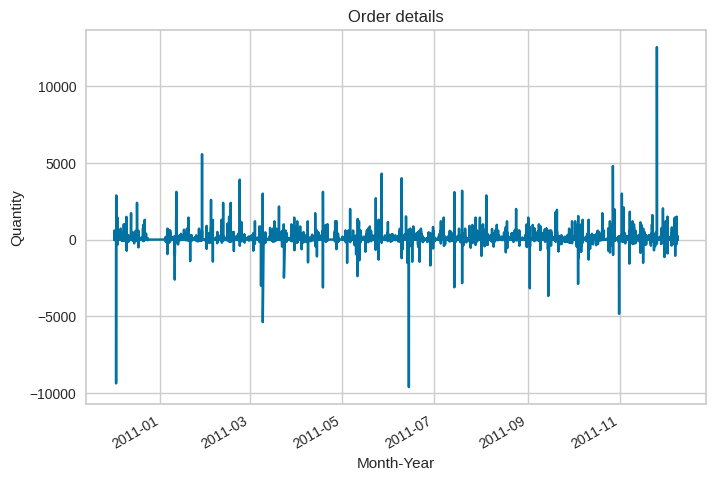

In [600]:
cancelled_temporal['Quantity'].plot()
plt.title("Order details")
plt.ylabel("Quantity")